# Load libraries and dataset

https://www.kaggle.com/code/d4rklucif3r/water-quality-luciferml-76-deployment
https://www.kaggle.com/code/jaykumar1607/water-quality-analysis-plotly-and-modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [2]:
water_dataset = pd.read_csv("../datasets/habitat/water_potability.csv")

In [3]:
water_dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.67,193.68,47580.99,7.17,359.95,526.42,13.89,66.69,4.44,1
3272,7.81,193.55,17329.80,8.06,NaN,392.45,19.90,NaN,2.80,1
3273,9.42,175.76,33155.58,7.35,NaN,432.04,11.04,69.85,3.30,1
3274,5.13,230.60,11983.87,6.30,NaN,402.88,11.17,77.49,4.71,1


In [4]:
water_dataset.corr().style.background_gradient(cmap='coolwarm')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [5]:
water_dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.00,3276.00,3276.00,3276.00,2495.00,3276.00,3276.00,3114.00,3276.00,3276.00
mean,7.08,196.37,22014.09,7.12,333.78,426.21,14.28,66.40,3.97,0.39
std,1.59,32.88,8768.57,1.58,41.42,80.82,3.31,16.18,0.78,0.49
min,0.00,47.43,320.94,0.35,129.00,181.48,2.20,0.74,1.45,0.00
25%,6.09,176.85,15666.69,6.13,307.70,365.73,12.07,55.84,3.44,0.00
50%,7.04,196.97,20927.83,7.13,333.07,421.88,14.22,66.62,3.96,0.00
75%,8.06,216.67,27332.76,8.11,359.95,481.79,16.56,77.34,4.50,1.00
max,14.00,323.12,61227.20,13.13,481.03,753.34,28.30,124.00,6.74,1.00


<Axes: ylabel='Potability'>

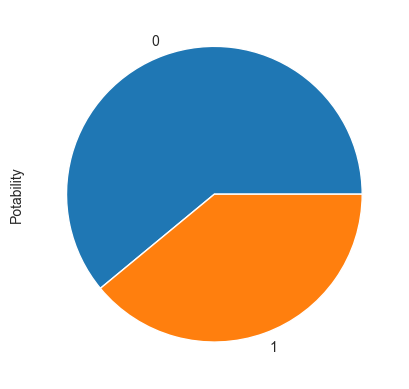

In [6]:
water_dataset["Potability"].value_counts().plot.pie()

<Axes: >

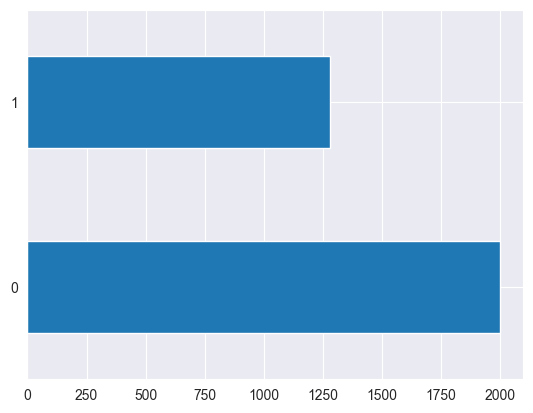

In [7]:
water_dataset["Potability"].value_counts().plot.barh()

<Axes: ylabel='Density'>

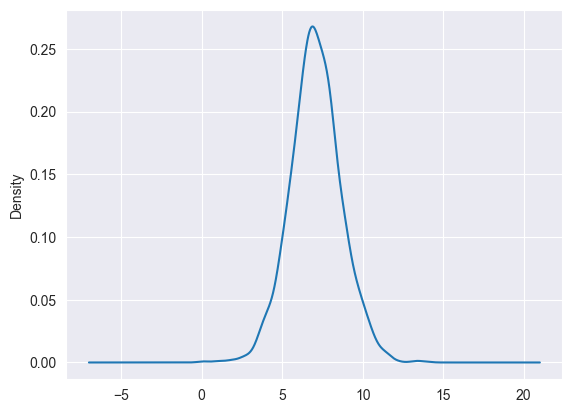

In [8]:
water_dataset["ph"].plot.density()

In [9]:
water_dataset["ph"].describe()

count   2785.00
mean       7.08
std        1.59
min        0.00
25%        6.09
50%        7.04
75%        8.06
max       14.00
Name: ph, dtype: float64

count   2495.00
mean     333.78
std       41.42
min      129.00
25%      307.70
50%      333.07
75%      359.95
max      481.03
Name: Sulfate, dtype: float64

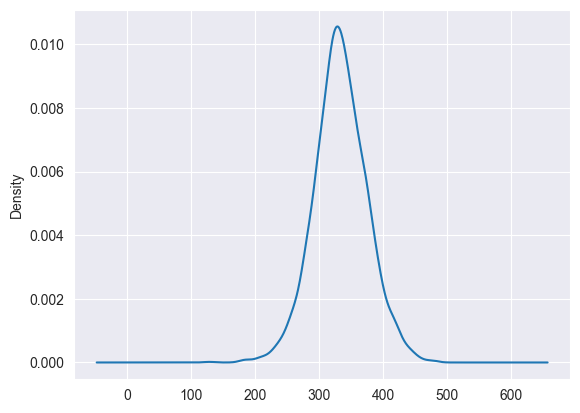

In [10]:
water_dataset["Sulfate"].plot.density()
water_dataset["Sulfate"].describe()

count   3276.00
mean     196.37
std       32.88
min       47.43
25%      176.85
50%      196.97
75%      216.67
max      323.12
Name: Hardness, dtype: float64

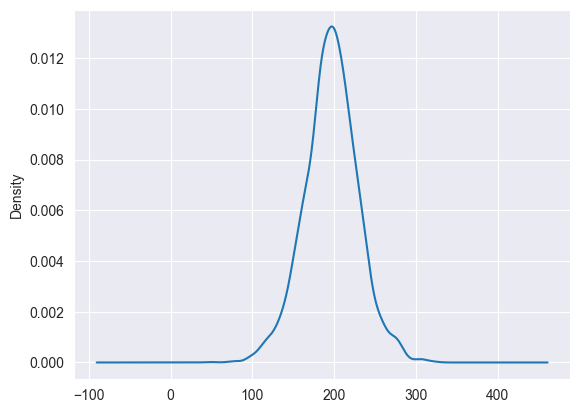

In [11]:
water_dataset["Hardness"].plot.density()
water_dataset["Hardness"].describe()

In [18]:
water_dataset = water_dataset.fillna(water_dataset.mean())

In [24]:
water_dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.08,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,333.78,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,333.78,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.67,193.68,47580.99,7.17,359.95,526.42,13.89,66.69,4.44,1
3272,7.81,193.55,17329.80,8.06,333.78,392.45,19.90,66.40,2.80,1
3273,9.42,175.76,33155.58,7.35,333.78,432.04,11.04,69.85,3.30,1
3274,5.13,230.60,11983.87,6.30,333.78,402.88,11.17,77.49,4.71,1


##### Apart from doing some ML prediction to see if water will be potable or not based on the features above, we can also set thresholds and if it ever goes below those we alert the astronauts.

In [19]:
# LGBM best model <3
y= water_dataset["Potability"]
X = water_dataset.drop(columns=["Potability"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7, random_state = 42)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:03<00:00,  9.41it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.67,0.61,0.61,0.64,0.02
NuSVC,0.64,0.61,0.61,0.63,0.21
ExtraTreesClassifier,0.67,0.60,0.60,0.63,0.25
LGBMClassifier,0.64,0.60,0.60,0.63,0.19
SVC,0.67,0.59,0.59,0.62,0.25
RandomForestClassifier,0.64,0.58,0.58,0.62,0.79
XGBClassifier,0.62,0.58,0.58,0.61,0.31
LabelPropagation,0.60,0.57,0.57,0.60,0.08
BaggingClassifier,0.62,0.57,0.57,0.60,0.13


In [21]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

y= water_dataset["Potability"]
X = water_dataset.drop(columns=["Potability"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7, random_state = 42)

clf = QuadraticDiscriminantAnalysis()

clf.fit(X, y)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.90      0.78      1405
           1       0.68      0.34      0.45       889

    accuracy                           0.68      2294
   macro avg       0.68      0.62      0.61      2294
weighted avg       0.68      0.68      0.65      2294



In [22]:
import joblib
joblib.dump(clf, 'water_potability_model.pkl')

['water_potability_model.pkl']